In [1]:
import matplotlib.pyplot as plt
import numpy as np

from reservoirpy.datasets import lorenz, doublescroll
from reservoirpy.observables import nrmse
from reservoirpy.nodes import Ridge, NVAR

%matplotlib inline

In [ ]:
dt = 0.1

train_time  = 80.

test_time   = 10.

warm_time   = 50.


train_steps = round(train_time / dt)
test_steps  = round(test_time  / dt)
warm_steps  = round(warm_time  / dt)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from dysts.flows import DoublePendulum




total_time = train_time + test_time + warm_time
print("Total time: ", total_time)

n_timesteps = train_steps + test_steps + warm_steps
print("Total steps: ", n_timesteps)

model = DoublePendulum()

model.ic = np.array([-np.pi/1, 1, -np.pi/3, 2.5]) 

X = model.make_trajectory(n_timesteps, postprocess=False)

print(X.shape)


Total time:  140.0
Total steps:  1400
(1400, 4)


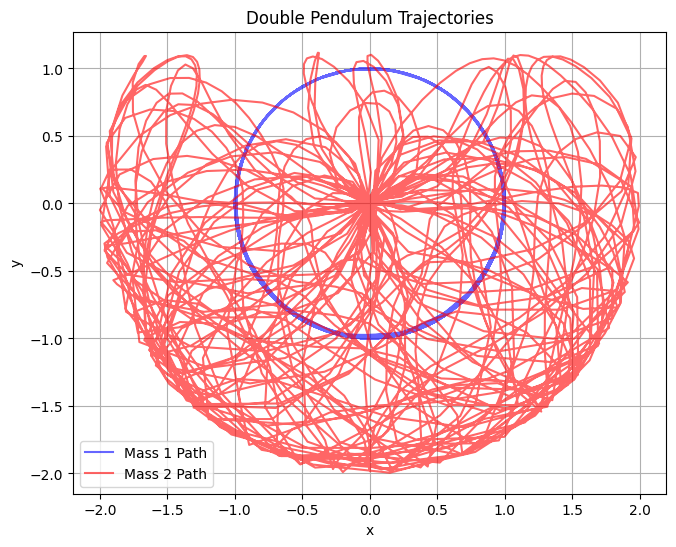

[[-3.14159265  1.         -1.04719755  2.5       ]
 [-3.12918668  1.28302543 -1.08297063  2.00217705]
 [-3.14686198  1.48337115 -1.03815727  1.37809282]
 [-3.17734528  1.61124    -1.00211612  0.73763665]
 [-3.21015847  1.66913168 -1.00959184  0.12283115]]


In [ ]:

l1 = 1.0 
l2 = 1.0  


def plot_data(th1, th2):

    
    x1 = l1 * np.sin(th1)
    y1 = -l1 * np.cos(th1)

    x2 = x1 + l2 * np.sin(th2)
    y2 = y1 - l2 * np.cos(th2)

    cartesian_traj = np.stack([x1, y1, x2, y2], axis=1)


    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, label='Mass 1 Path', color='blue', alpha=0.6)
    plt.plot(x2, y2, label='Mass 2 Path', color='red', alpha=0.6)
    plt.title("Double Pendulum Trajectories")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_data(X[:,0], X[:,1])

print(X[:5, :])


In [ ]:
from reservoirpy.nodes import Ridge, NVAR
nvar = NVAR(delay=1, order=2, strides=1) 
readout = Ridge(4,ridge=1e-4, input_bias=False)

model = nvar >> readout

In [6]:
Xi  = X[:train_steps+warm_steps-1]
dXi = X[1:train_steps+warm_steps] - X[:train_steps+warm_steps-1]

print(f"Xi shape: {Xi.shape}, dXi shape: {dXi.shape}")

model = model.fit(Xi, dXi, warmup=warm_steps)

nvar.run(X[warm_steps+train_steps-2:warm_steps+train_steps])
u = X[warm_steps+train_steps]
res = np.zeros((test_steps, readout.output_dim))
for i in range(test_steps):
    u = u + model(u)
    res[i, :] = u

Xi shape: (1299, 4), dXi shape: (1299, 4)


Running Model-0: 1299it [00:00, 4081.60it/s]<?, ?it/s]
Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


Fitting node Ridge-0...


Running NVAR-0: 100%|██████████| 2/2 [00:00<00:00, 2389.24it/s]
/home/julien2429/anaconda3/envs/py311/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/julien2429/anaconda3/envs/py311/lib/python3.11/site-packages/reservoirpy/nodes/readouts/base.py:92: RuntimeWarning: invalid value encountered in matmul
  return (node.Wout.T @ x.reshape(-1, 1) + node.bias.T).T


(100, 4)
(100, 4)


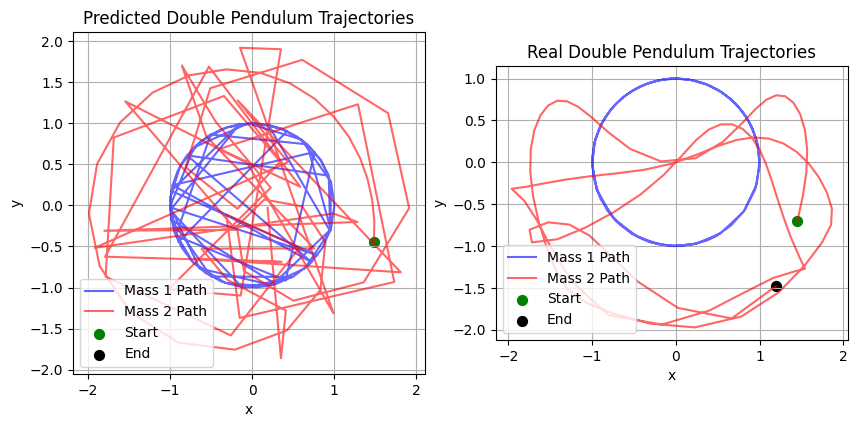

In [ ]:
N = test_steps
Y = X[warm_steps+train_steps:]

fig = plt.figure(figsize=(10, 10))


ax = fig.add_subplot(121)
ax.set_title("Predicted Double Pendulum Trajectories")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(False)

th1 = res[:, 0]
th2 = res[:, 1]
x1 = l1 * np.sin(th1)
y1 = -l1 * np.cos(th1)

x2 = x1 + l2 * np.sin(th2)
y2 = y1 - l2 * np.cos(th2)

cartesian_traj = np.stack([x1, y1, x2, y2], axis=1) 

ax.plot(x1, y1, label='Mass 1 Path', color='blue', alpha=0.6)
ax.plot(x2, y2, label='Mass 2 Path', color='red', alpha=0.6)


ax.scatter(x2[0], y2[0], color='green', s=50, label='Start')
ax.scatter(x2[-1], y2[-1], color='black', s=50, label='End')

ax.set_aspect('equal')
ax.legend()
ax.grid(True)



ax2 = fig.add_subplot(122)
ax2.set_title("Real Double Pendulum Trajectories")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

th1 = Y[:, 0]
th2 = Y[:, 1]

x1 = l1 * np.sin(th1)
y1 = -l1 * np.cos(th1)

x2 = x1 + l2 * np.sin(th2)
y2 = y1 - l2 * np.cos(th2)

ax2.plot(x1, y1, label='Mass 1 Path', color='blue', alpha=0.6)
ax2.plot(x2, y2, label='Mass 2 Path', color='red', alpha=0.6)


ax2.scatter(x2[0], y2[0], color='green', s=50, label='Start')
ax2.scatter(x2[-1], y2[-1], color='black', s=50, label='End')

ax2.set_aspect('equal')
ax2.legend()
ax2.grid(True)

print(res.shape)
print(Y.shape)


In [8]:
%matplotlib widget
import matplotlib.pyplot as plt

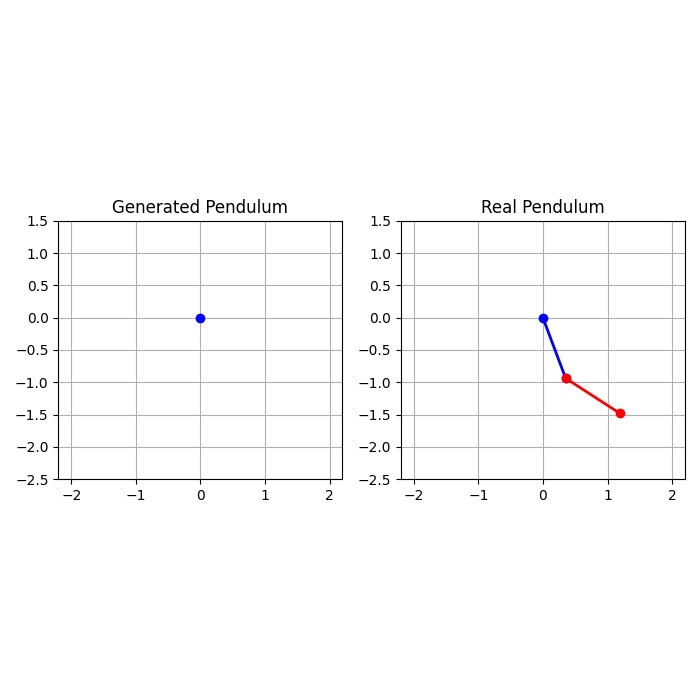

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.animation import FuncAnimation, FFMpegWriter


l1, l2 = 1.0, 1.0



N = test_steps
Y = X[warm_steps + train_steps:]

def get_positions(data):
    th1, th2 = data[:, 0], data[:, 1]
    x1 = l1 * np.sin(th1)
    y1 = -l1 * np.cos(th1)
    x2 = x1 + l2 * np.sin(th2)
    y2 = y1 - l2 * np.cos(th2)
    return x1, y1, x2, y2

x1_res, y1_res, x2_res, y2_res = get_positions(res)
x1_true, y1_true, x2_true, y2_true = get_positions(Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7))

for ax in (ax1, ax2):
    ax.set_xlim(-2.2, 2.2)
    ax.set_ylim(-2.5, 1.5)
    ax.set_aspect('equal')
    ax.grid(True)

ax1.set_title("Generated Pendulum")
ax2.set_title("Real Pendulum")

gen_line1, = ax1.plot([], [], 'o-', lw=2, color='blue')
gen_line2, = ax1.plot([], [], 'o-', lw=2, color='red')

true_line1, = ax2.plot([], [], 'o-', lw=2, color='blue')
true_line2, = ax2.plot([], [], 'o-', lw=2, color='red')

def init():
    gen_line1.set_data([], [])
    gen_line2.set_data([], [])
    true_line1.set_data([], [])
    true_line2.set_data([], [])
    return gen_line1, gen_line2, true_line1, true_line2


def update(frame):

    gen_line1.set_data([0, x1_res[frame]], [0, y1_res[frame]])
    gen_line2.set_data([x1_res[frame], x2_res[frame]], [y1_res[frame], y2_res[frame]])


    true_line1.set_data([0, x1_true[frame]], [0, y1_true[frame]])
    true_line2.set_data([x1_true[frame], x2_true[frame]], [y1_true[frame], y2_true[frame]])

    return gen_line1, gen_line2, true_line1, true_line2


ani = FuncAnimation(fig, update, frames=N, init_func=init, blit=True, interval=20)

FFwriter = FFMpegWriter(fps=10)
ani.save('./pendulum_5.mp4', writer=FFwriter)

plt.tight_layout()
plt.show()


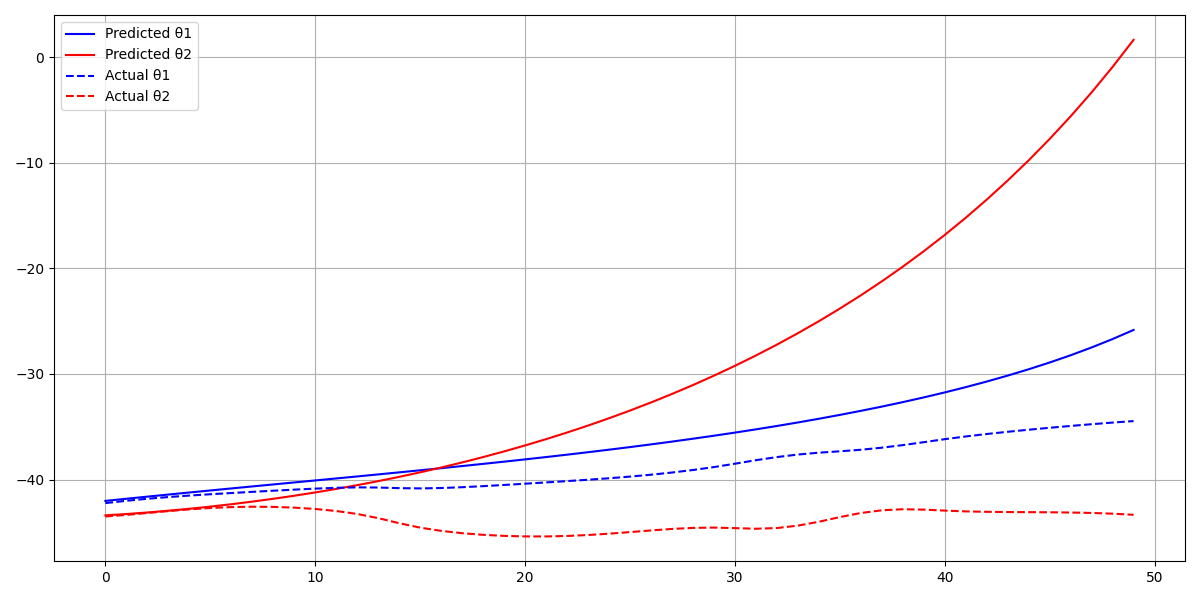

In [ ]:
plt.figure(figsize=(12, 6))

N_new = 50
plt.subplot(1, 1, 1)
plt.plot(np.arange(N_new), res[:N_new, 0], label='Predicted θ1', color='blue')
plt.plot(np.arange(N_new), res[:N_new, 1], label='Predicted θ2', color='red')
plt.plot(np.arange(N_new), Y[:N_new, 0], label='Actual θ1', color='blue', linestyle='--')
plt.plot(np.arange(N_new), Y[:N_new, 1], label='Actual θ2', color='red', linestyle='--')

plt.legend()
plt.grid(True)

plt.grid(True)

plt.tight_layout()
plt.show()